# ECI 249 Assignment \#1

Kenneth Larrieu

## 1. Hazardous Waste Disposal

### a. Decision Tree and Present Value Cost

![](tree.jpg)

$$\boxed{C_T = T}$$

$$C_{LF} = D + P(1+i)^{-1}F + P(1-P)(1+i)^{-2}F + P(1-P)^2(1+i)^{-3}F + ...$$

$$C_{LF} = D + \sum_{k=1}^{\infty} P(1-P)^{k-1}(1+i)^{-k}F = D + PF \sum_{k=1}^{\infty} (1-P)^{k-1}(1+i)^{-k}$$

$$C_{LF} = D + \frac{PF}{1-P} \sum_{k=1}^{\infty} \left( \frac{1-P}{1+i} \right) ^{k}$$

The last term is a geometric series:

$$\sum_{k=1}^{\infty} \left( \frac{1-P}{1+i} \right)^{k} =  \frac{1-P}{1+i} \frac{1}{1-\frac{1-P}{1+i}}$$

Simplifying yields

$$\boxed{C_{LF} = D + \frac{F}{1+\frac{i}{P}}}$$

### b. Determine when each alternative is preferred.

Then the ratio of costs becomes:

$$R = \frac{C_{LF}}{C_T} = \frac{D}{T} + \left( \frac{F}{T} \right) \left( \frac{1}{1+\frac{i}{P}} \right)$$

When $R<1$, landfill is preferred; when $R>1$, treatment is preferred; and when $R=1$, there is no preference for either alternative.

A natural choice of dimensionless parameters becomes:

$$\pi_1 = \frac{F}{T}, \quad \pi_2 = \frac{1}{1+\frac{i}{P}}, \quad \pi_3 = \frac{D}{T}$$

The provided range of values for $D$, $F$, $T$, $i$, and $P$ limit the range of possible values for $\pi_1$, $\pi_2$, and $\pi_3$:

$$0 \leq \pi_1 < \infty, \quad 0 \leq \pi_2 \leq \frac{1}{1.01}, \quad 0 \leq \pi_3 < \infty $$

Then $R$ can be written as:

$$R = \pi_3 + \pi_1 \pi_2$$

We can readily visualize the best decisions over the parameter space:

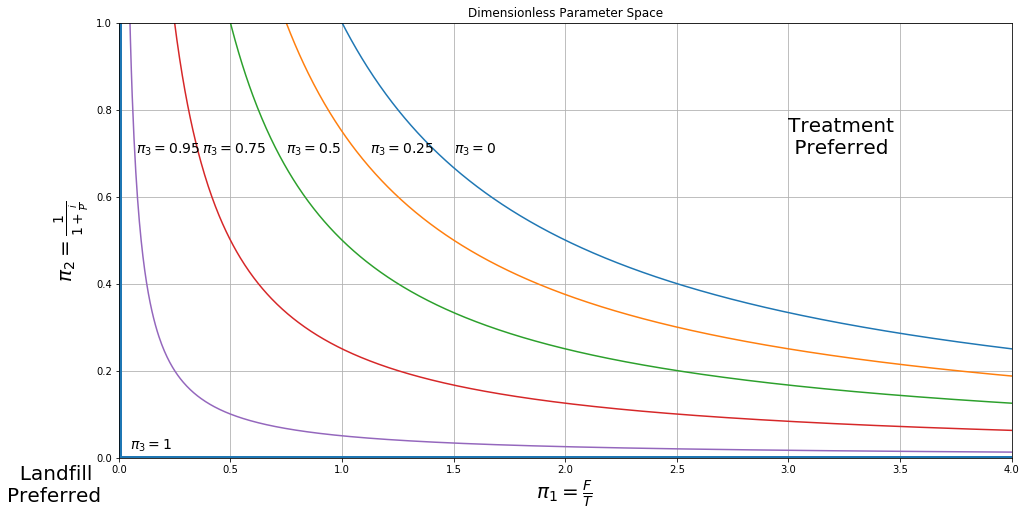

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

x = np.linspace(0.0001, 4, 1000)

def contour(x, pi_3):
    # returns pi_2 for a given pi_3 and pi_1 (x != 0)
    return (1 - pi_3)*1.0/x

fig, ax = plt.subplots(figsize = (16, 8))
ax.set(title='Dimensionless Parameter Space')
ax.set_xlabel(r'$\pi_1 = \frac{F}{T}$', fontsize=20)
ax.set_ylabel(r'$\pi_2 = \frac{1}{1+\frac{i}{P}}$', fontsize=20)
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.grid()

for pi_3 in [0, 0.25, 0.5, 0.75, 0.95]:
    ax.plot(x, contour(x, pi_3=pi_3), label=r'$\pi_3 = $' + r'$%s$' % str(pi_3))
    ax.text(1.5 - pi_3*1.5, 0.7, r'$\pi_3 = $' + r'$%s$' % str(pi_3), fontsize=14)

ax.axvline(0, linewidth=5)
ax.axhline(0, linewidth=5)
ax.text(0.05, 0.02, r'$\pi_3 = 1$', fontsize=14)
    
ax.text(3, 0.7, 'Treatment\n Preferred', fontsize=20)
ax.text(-0.5, -0.1, '  Landfill\nPreferred', fontsize=20)

plt.show()

Contour lines are plotted for various values of $\pi_3$ on which $R=1$. For each value of $\pi_3$, landfilling is preferred for points below the curve, and treatment is preferred for points above the curve. From here we see that treatment is always preferred for points above the $\pi_3 = 0$ contour, which corresponds to the curve $\pi_2 = \frac{1}{\pi_1}$. When $\pi_3=1$, the corresponding contour lines are $\pi_1=0$ and $\pi_2=0$, along which neither alternative is preferred, but treatment is preferred for the rest of parameter space. Lastly, when $\pi_3 > 1$ (i.e. $\frac{D}{T} > 1$), treatment is preferred across all parameter space.

## Value of an Imperfect Test



Given:

$$
\begin{array}{r|r|r|}
 & SS & NSS \\ \hline
P() & 0.05 & 0.95 \\ \hline
P(+|\_) & 0.90 & 0.20 \\
P(-|\_) & 0.10 & 0.80 \\ \hline
\end{array}
$$

Applying Bayes Theorem to get the conditional probabilities $P(SS | +)$, $P(SS | -)$, $P(NSS | +)$, $P(NSS | -)$, and the law of total probability to get $P(+)$ and $P(-)$: 

$$
\begin{array}{r|r|r|}
 & + & - \\ \hline
 P() & 0.235 & 0.765 \\ \hline
 P(SS|\_) & 0.1915 & 0.006536 \\
 P(NSS|\_) & 0.8085 & 0.993464 \\ \hline
\end{array}
$$

Then we can calculate the overall probability of death, given the test result (or lack thereof) and treatment (or lack thereof).

It is given that the treatment is 99% effective with a 3% mortality rate. Untreated, someone with sleeping sickness has a $20\%$ chance of death.

Overall chance of death:

$$
\begin{array}{r|r|r|}
\text{Test} & \text{Treated} & \text{Untreated} \\ \hline
\text{No Test} & 0.030097 & 0.01 \\
+& 0.03037 & 0.0383 \\
-& 0.03001 & 0.0013072 \\ \hline
\end{array}
$$

e.g. $P(\text{D } | \text{ no test, treat}) = 0.03 + 0.97 \cdot 0.05 \cdot 0.01 \cdot 0.20 =  0.030097$

We can conclude that the test is worthwhile, since the chance of death is lower for treatment given a positive test result, and the chance of death is lower when untreated given a negative test result or no test.